In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from test_model import *
import numpy as np

In [3]:
model_path = "./checkpoints/baseline/iter_1590000.pth.tar"

/home/lucas/.conda/envs/research_project/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1699449183005/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


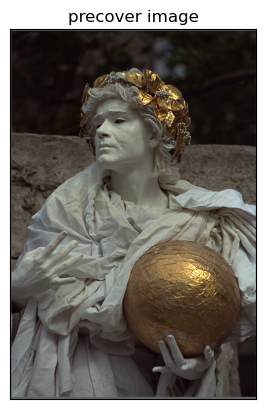

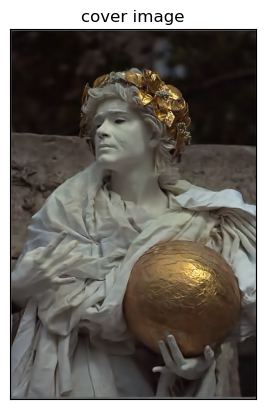

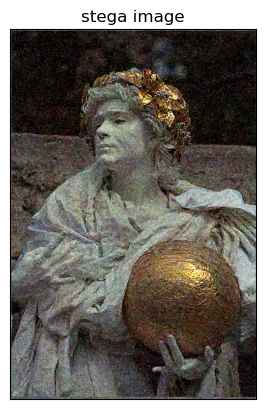

(3.1873185634613037, 23.355327606201172)

In [4]:
selection = np.random.choice(24,1)
selection = [16]
test(model_path,selection,plot=True,stega=True,p=0.3) # p is half the insertion rate

In [7]:
from tqdm import tqdm

P = np.linspace(0.01,1/3,50)

img_selection = list(range(24))

avg_PSNR_stega_cover = [test(model_path,img_selection,stega=True,p=p)[1] for p in tqdm(P)]

100%|██████████| 50/50 [02:42<00:00,  3.24s/it]


Regarder la différence entre stega et cover.
Faire steganalyse -> récupérer une base d'image

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

def H(p):
    return -2*p*math.log(p,2) - (1-2*p)*math.log(1-2*p,2)

In [9]:
H_p = [H(p) for p in tqdm(P)]

100%|██████████| 50/50 [00:00<00:00, 352462.52it/s]


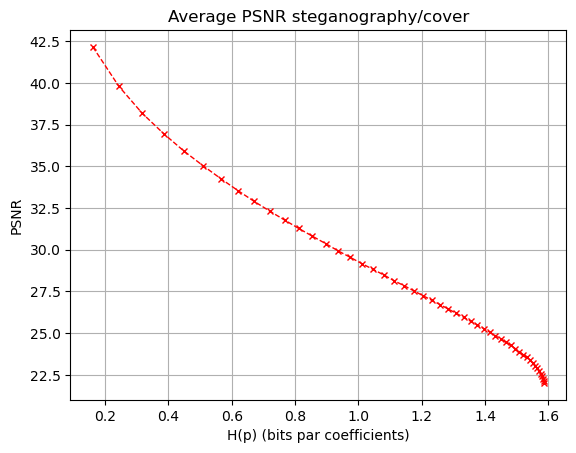

In [29]:
plt.plot(H_p,avg_PSNR_stega_cover,"--xr",markersize=5,lw=1)
plt.title("Average PSNR steganography/cover")
plt.xlabel("H(p) (bits par coefficients)")
plt.ylabel("PSNR")
plt.grid()
plt.show()

Text(42.597222222222214, 0.5, 'H(p) (bits)')

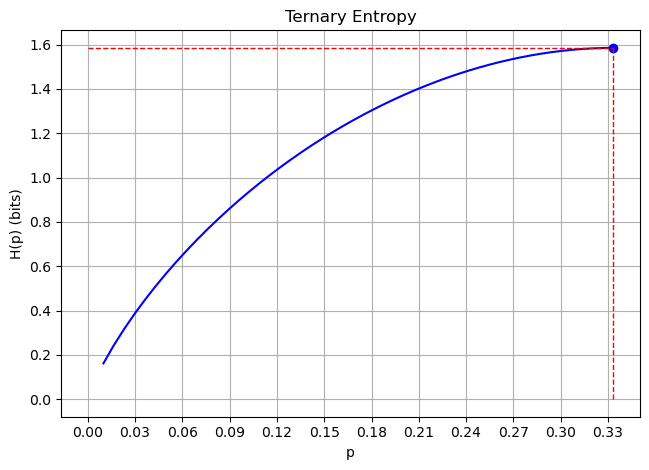

In [24]:
plt.plot(P,H_p,"-b")
plt.title("Ternary Entropy")
plt.plot([1/3],[H(1/3)],"ob")
plt.plot([1/3,1/3],[0,H(1/3)],"--r",lw=1)
plt.plot([0,1/3],[H(1/3),H(1/3)],"--r",lw=1)
plt.grid()
plt.xlabel("p")
plt.xticks(np.round(np.linspace(0,1/3,12),2))
plt.tight_layout()
plt.ylabel("H(p) (bits)")

In [27]:
H(1/30) # pour avoir 0.4 bits d'insertion

0.420026001688088